In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

%matplotlib inline
customer_data = pd.read_csv("customerdata4.csv")
customer_data.head()



,CustomerID,Gender,Age,Annual Income (10kkr),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


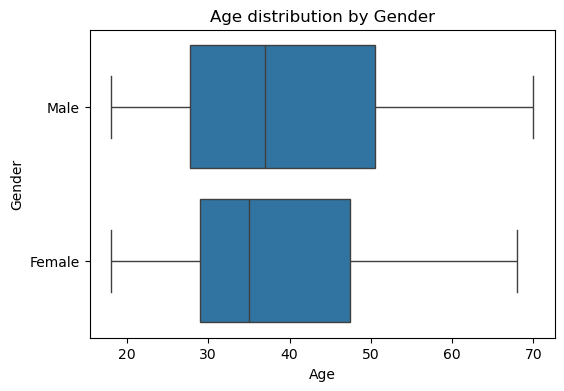

In [11]:
plt.figure(figsize=(6,4))
sns.boxplot(data=customer_data, x="Age", y="Gender")
plt.title("Age distribution by Gender")
plt.show()


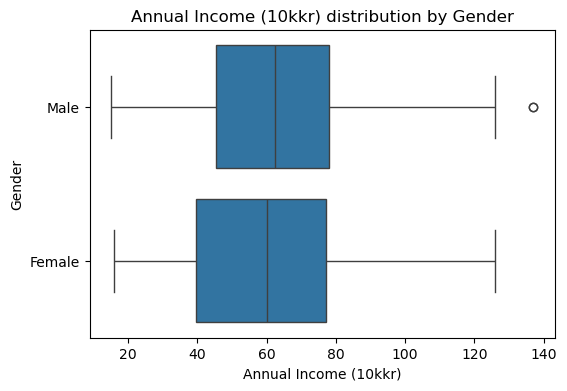

In [10]:
plt.figure(figsize=(6,4))
sns.boxplot(data=customer_data, x="Annual Income (10kkr)", y="Gender")
plt.title("Annual Income (10kkr) distribution by Gender")
plt.show()

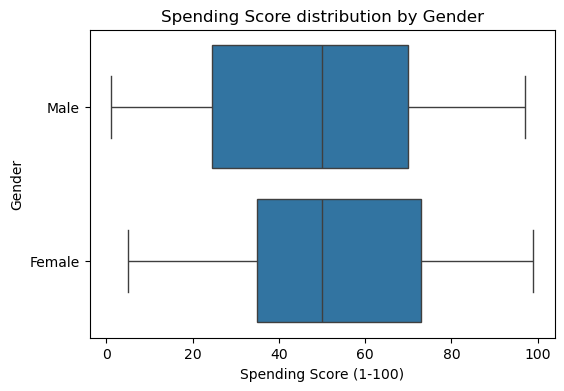

In [17]:
plt.figure(figsize=(6,4))
sns.boxplot(data=customer_data, x="Spending Score (1-100)", y="Gender")
plt.title("Spending Score distribution by Gender")
plt.show()

In [23]:
customer_data[["Age", "Spending Score (1-100)"]].describe()


,Age,Spending Score (1-100)
count,200.000000,200.000000
mean,38.850000,50.200000
std,13.969007,25.823522
min,18.000000,1.000000
25%,28.750000,34.750000
50%,36.000000,50.000000
75%,49.000000,73.000000
max,70.000000,99.000000


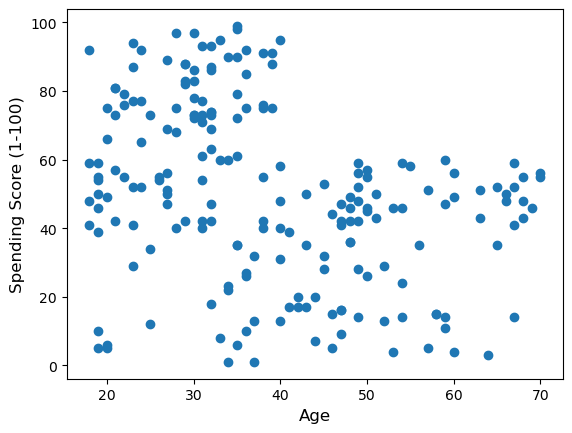

In [47]:
plt.scatter(customer_data.iloc[:,2].values, customer_data.iloc[:,4].values)
plt.xlabel("Age", size=12)
plt.ylabel("Spending Score (1-100)", size=12)
plt.show()


In [68]:
X = customer_data[["Age", "Spending Score (1-100)"]].values
X[:6]   # visar de 5 första raderna

array([[19, 39],
       [21, 81],
       [20,  6],
       [23, 77],
       [31, 40],
       [22, 76]])

c:\Program Files\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Program Files\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Program Files\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Program Files\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Wi

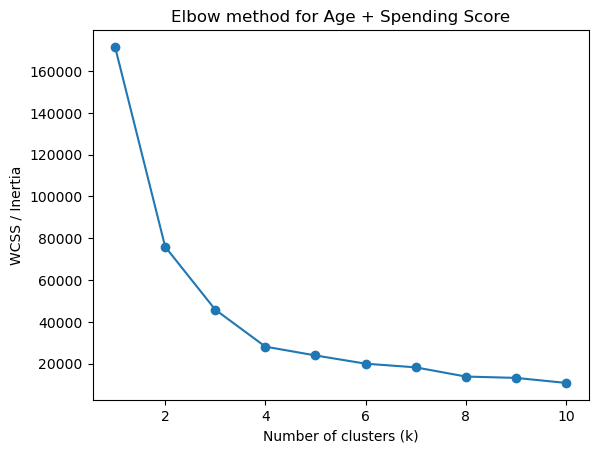

In [50]:
from sklearn.cluster import KMeans

wcss = []  # lista som ska spara inertia-värden (WCSS)
for i in range(1, 11):  # testar k = 1,2,...,10
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)              # tränar modellen på dina två kolumner (Age, Spending Score)
    wcss.append(kmeans.inertia_)  # inertia_ = hur "tighta" klustren är för detta k

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow method for Age + Spending Score')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS / Inertia')
plt.show()


c:\Program Files\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


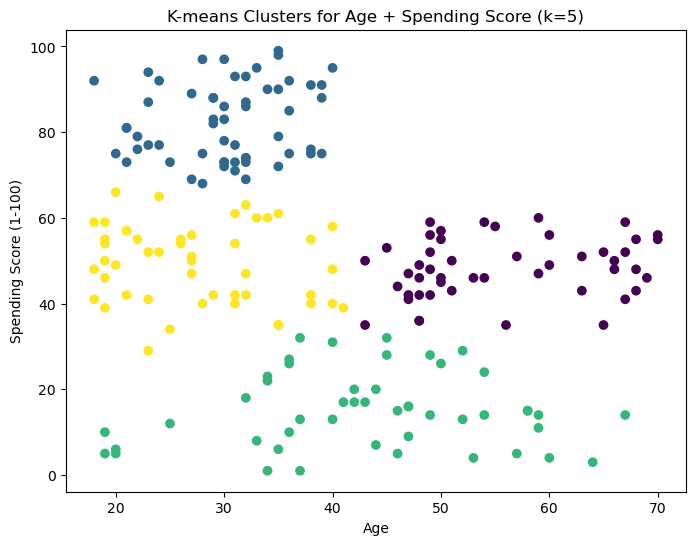

In [75]:
k = 4  # välj k baserat på elbow-grafen

kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X)   # här får du klusteretiketter för varje kund

# Lägg till klustret i din DataFrame
customer_data["Cluster_T13"] = clusters

plt.figure(figsize=(8, 6))
plt.scatter(
    X[:, 0], 
    X[:, 1], 
    c=customer_data["Cluster_T13"], 
    cmap='viridis'
)

plt.title("K-means Clusters for Age + Spending Score (k=5)")
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.show()


In [76]:
# 1) K-means-klustercentra (i samma ordning som X: [Age, Spending Score])
kmeans.cluster_centers_



array([[55.70833333, 48.22916667],
       [30.1754386 , 82.35087719],
       [43.29166667, 15.02083333],
       [27.61702128, 49.14893617]])

In [54]:
# 2) Medelvärden per kluster (lite lättare att läsa)
customer_data.groupby("Cluster_T13")[["Age", "Spending Score (1-100)"]].mean()


,Age,Spending Score (1-100)
Cluster_T13,,
0,55.978723,48.510638
1,28.684211,71.500000
2,43.425532,14.659574
3,28.300000,45.575000
4,31.285714,90.392857


In [66]:
X2 = customer_data[["Annual Income (10kkr)", "Spending Score (1-100)"]].values
X2[:5]   # visar de 5 första raderna

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]])

c:\Program Files\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Program Files\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Program Files\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Program Files\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Wi

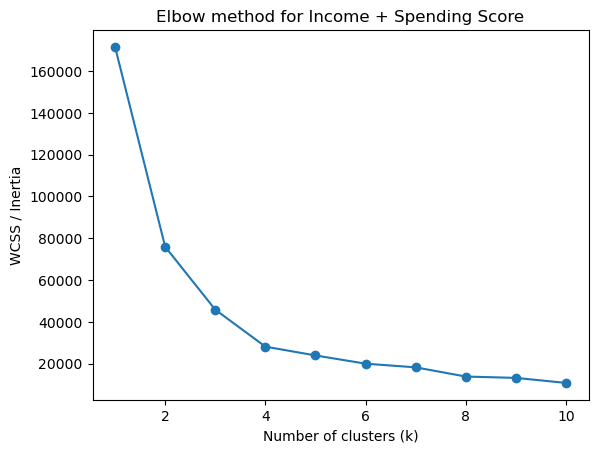

In [67]:
from sklearn.cluster import KMeans

wcss = []  # lista som ska spara inertia-värden (WCSS)
for i in range(1, 11):  # testar k = 1,2,...,10
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)              # tränar modellen på dina två kolumner (Age, Spending Score)
    wcss.append(kmeans.inertia_)  # inertia_ = hur "tighta" klustren är för detta k

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow method for Income + Spending Score')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS / Inertia')
plt.show()
